In [18]:
import numpy as np
from scipy import stats

In [19]:
rolls = np.random.choice([1,2,3,4,5,6],10000)
rolls

array([5, 3, 3, ..., 1, 5, 2])

In [20]:
rolls.mean()

3.4995

In [34]:
n = 15

rolls = np.random.choice([1,2,3,4,5,6],n)
rolls

array([4, 3, 2, 5, 3, 5, 1, 2, 4, 2, 1, 5, 3, 6, 4])

In [35]:
rolls.mean()

3.3333333333333335

In [27]:
import math

In [32]:
t = (rolls.mean()) - 3.5 / (rolls.std() / math.sqrt(n))
t

-5.462121243569207

In [31]:
stats.t(n-1).cdf(t) * 2

8.372076992351839e-05

###### fictional universe where they are confused and they think the average die roll is 4.5 aka H0 = 4.5

In [64]:
np.random.seed(15)
n = 15

rolls = np.random.choice([1,2,3,4,5,6],n)
rolls

array([1, 6, 5, 6, 1, 5, 4, 4, 6, 6, 2, 6, 1, 3, 5])

In [65]:
rolls.mean()

4.066666666666666

In [66]:
rolls.std()

1.9136933459209768

In [67]:
t = (rolls.mean() - 4.5) / (rolls.std() / math.sqrt(n))
t

-0.8769914923589074

In [68]:
stats.t(n-1).cdf(t) * 2

0.39529136156632283

### Correlation

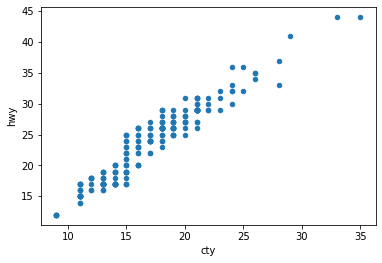

In [39]:
from pydataset import data
from scipy import stats
import pandas as pd

mpg = data("mpg")
mpg.plot.scatter(x="cty",y="hwy")

In [18]:
x = mpg.hwy
y = mpg.cty

r, p = stats.pearsonr(x,y)
r, p

(0.9559159136495721, 1.8683071952629614e-125)

Is there a linear relationship between engine displacement (displ) and city mileage (cty)

In [19]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


- h0 = there is no relationship between displ and cty
- h1 = there is a relationship between displ and cty

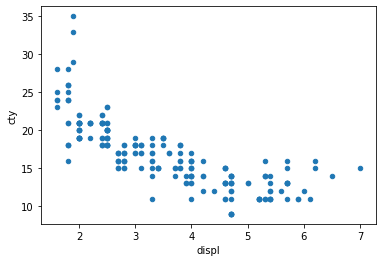

In [36]:
mpg.plot.scatter(x = "displ", y = "cty")

In [37]:
x = mpg.displ
y = mpg.cty
stats.pearsonr(x,y)

(-0.7985239689348551, 4.737914890205637e-53)

In [40]:
df = pd.read_csv('exam_scores.csv')
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


In [52]:
df2 = pd.read_csv("kickstarter.csv")
df2.head()
df2 = df2 [df2.status.isin(["failed","successful"])]
df2["success"] = df2.status == "successful"
pd.crosstab(df2.status, df2.category)

category,Art,Comics,Dance,Design,Fashion,Film & Video,Film &amp; Video,Food,Games,Music,Photography,Publishing,Technology,Theater
status,,,,,,,,,,,,,,
failed,1585,448,180,837,684,210,5962,643,832,3261,742,2484,448,680
successful,2106,520,527,729,335,246,6177,655,635,6792,645,1671,289,1642


In [59]:
ctab = pd.crosstab(df2.status, df2.category)
chi2_stat, p, degf, (observed, expected) = stats.chi2_contingency(ctab)
chi2_stat, p

(1889.1345627766664, 0.0)

In [60]:
df2.groupby("category").success.mean().sort_values()

category
Fashion             0.328754
Technology          0.392130
Publishing          0.402166
Games               0.432856
Photography         0.465032
Design              0.465517
Food                0.504622
Film &amp; Video    0.508856
Comics              0.537190
Film & Video        0.539474
Art                 0.570577
Music               0.675619
Theater             0.707149
Dance               0.745403
Name: success, dtype: float64